### Importing Libraries

In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix,ConfusionMatrixDisplay,r2_score,f1_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

### Loading DataSet

In [343]:
df = pd.read_csv(r"C:\Users\PERSONAL\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [344]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Information

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


### Datatypes

In [345]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### astype

In [346]:
#df['TotalCharges']=df['TotalCharges'].astype('int')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

customerID: Customer ID

gender: Whether the customer is a male or a female

SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)

checkPartner: Whether the customer has a partner or not (Yes, No)

checkDependents: Whether the customer has dependents or not (Yes, No)

Tenure: Number of months the customer has stayed with the company

checkPhoneService: Whether the customer has a phone service or not (Yes, No)

text_formatMultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)

text_formatInternetService: Customer’s internet service provider (DSL, Fiber optic, No)

text_formatOnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)

text_formatOnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)

text_formatDeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)

text_formatTechSupport: Whether the customer has tech support or not (Yes, No, No internet service)

text_formatStreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)

text_formatStreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)

text_formatContract: The contract term of the customer (Month-to-month, One year, Two year)

checkPaperlessBilling: Whether the customer has paperless billing or not (Yes, No)

text_formatPaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges: The amount charged to the customer monthly

TotalCharges: The total amount charged to the customer

checkChurn: Whether the customer churned or not (Yes or No)


### Drop unnecessary columns

In [347]:
#df.drop('customerID',axis = 1,inplace = True)
df.drop('customerID',axis = 1,inplace = True)

### Missing values

In [257]:
import missingno

<Axes: >

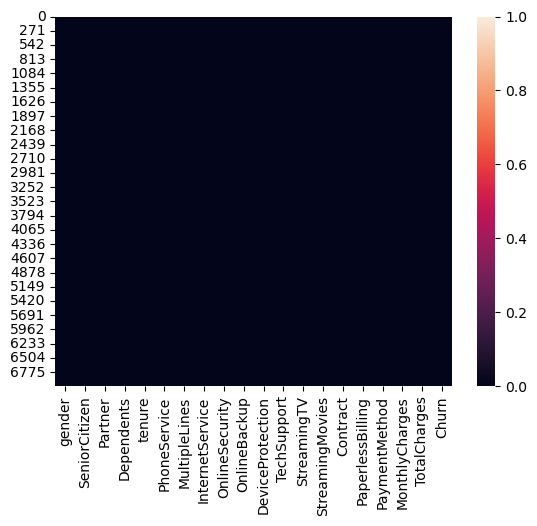

In [190]:
sns.heatmap(df.isnull())  #no null values

<Axes: >

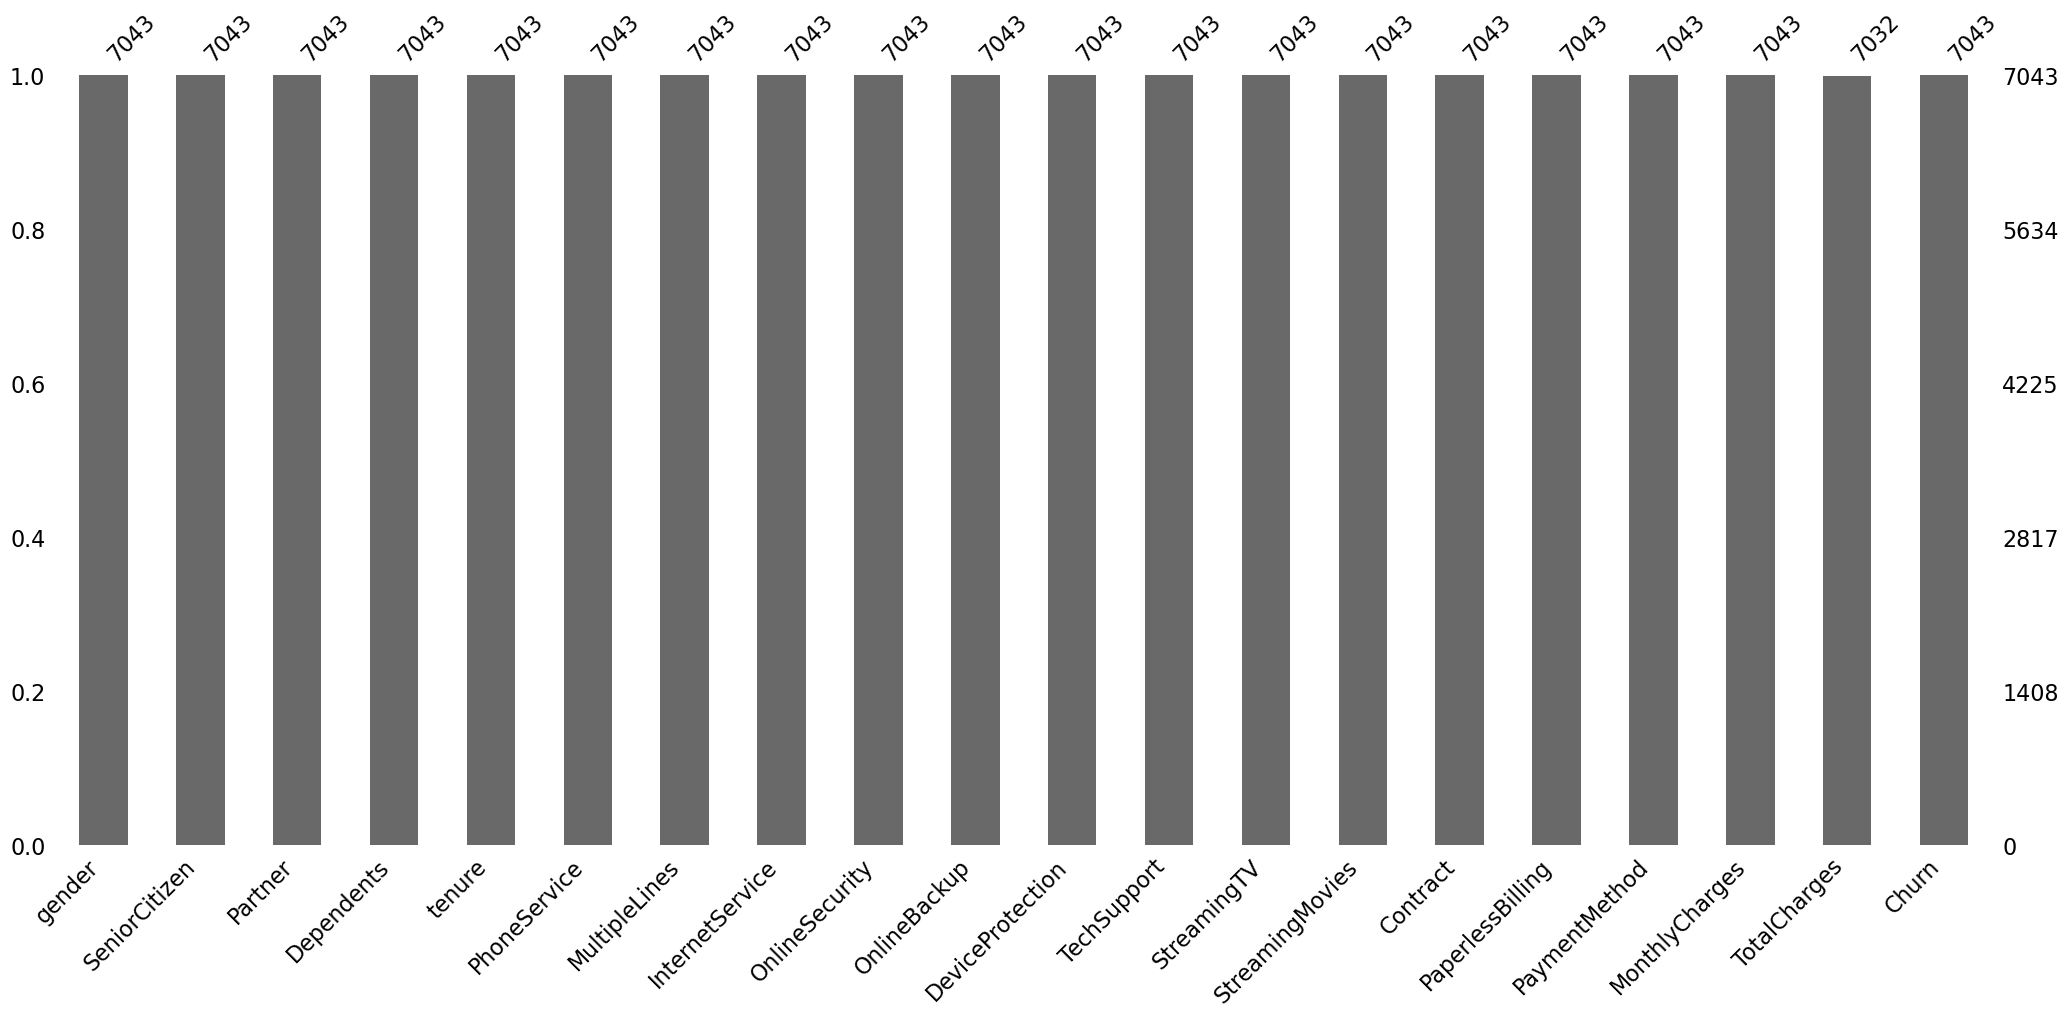

In [191]:
missingno.bar(df)

<Axes: >

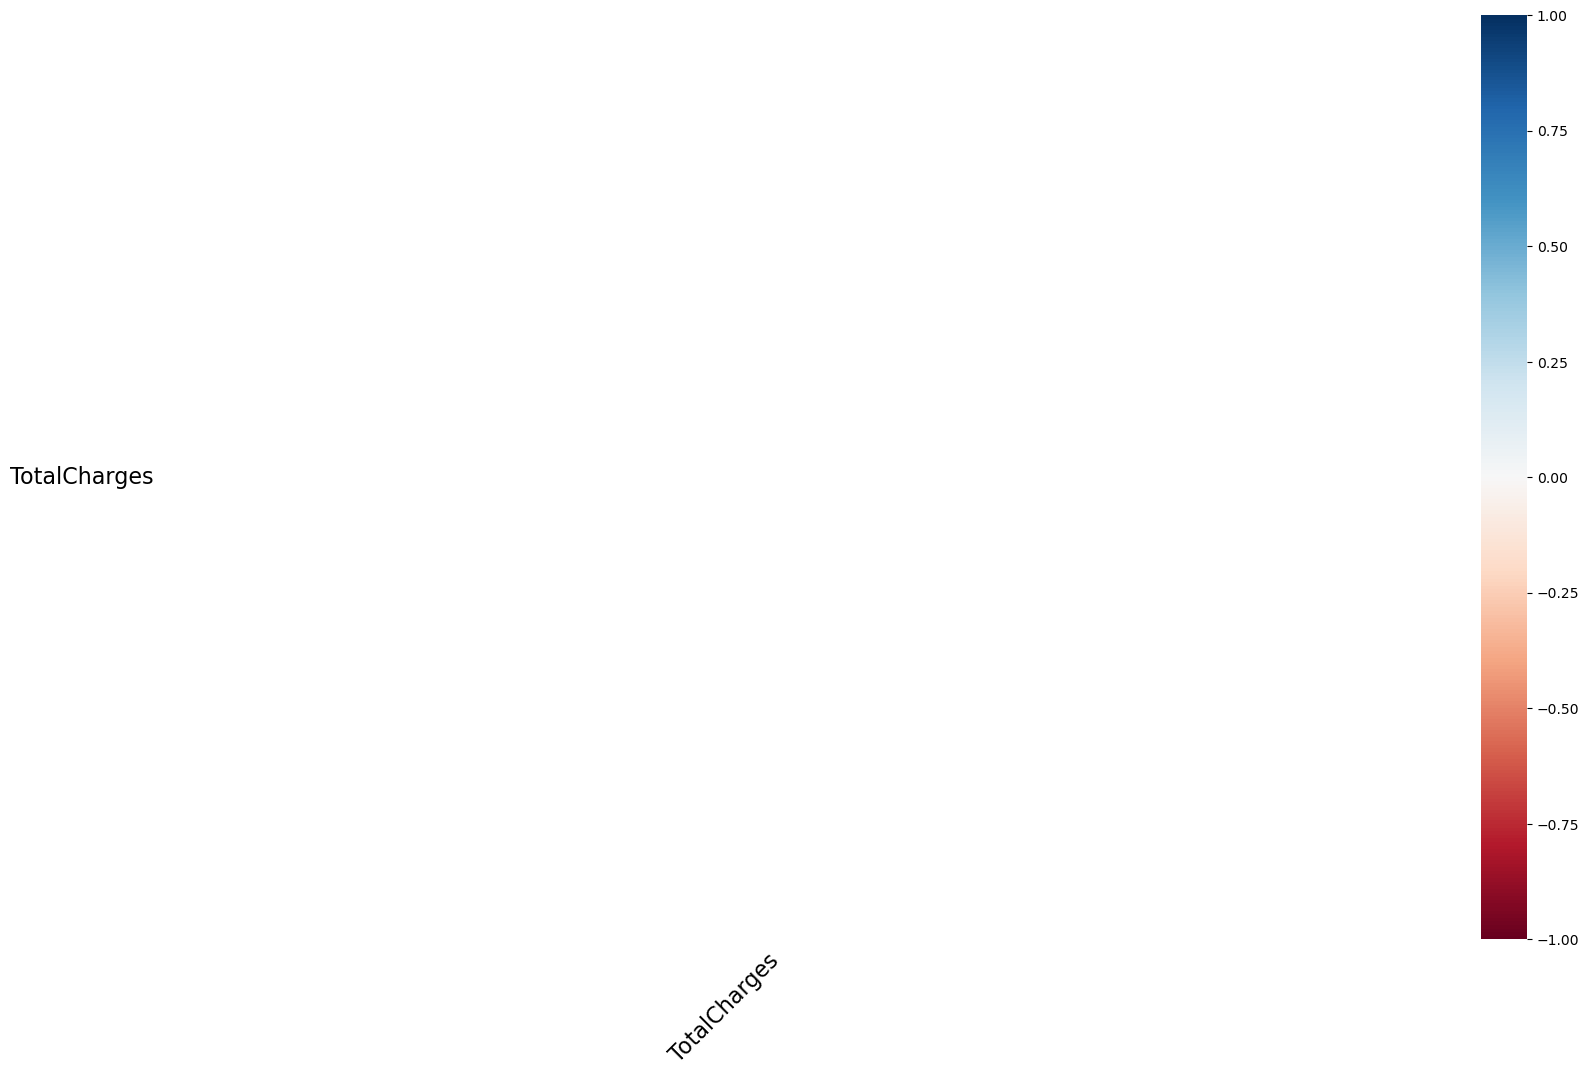

In [192]:
missingno.heatmap(df)

In [194]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### duplicated values

In [348]:
df.duplicated().sum()

22

In [349]:
df.drop_duplicates(inplace = True)

In [350]:
df.duplicated().sum()

0

### Columns

In [262]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Outliers

In [263]:
from feature_engine.outliers import Winsorizer ,OutlierTrimmer

<Axes: xlabel='tenure'>

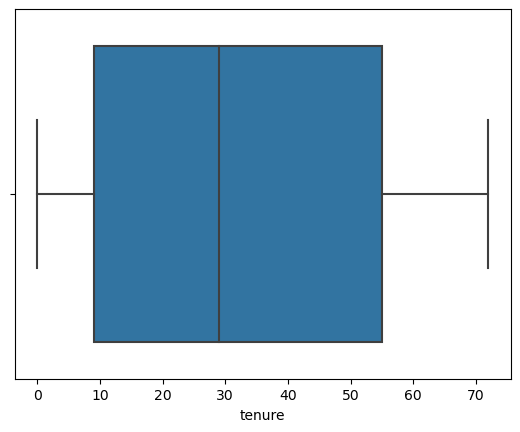

In [264]:
sns.boxplot(data = df ,x = 'tenure')

In [265]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Outlier Analysis on Numerical columns

In [362]:
numeric_df = df[['SeniorCitizen' , 'TotalCharges' , 'MonthlyCharges' , 'tenure']]
numeric_df

,SeniorCitizen,TotalCharges,MonthlyCharges,tenure
0,0,29.85,29.85,1
1,0,1889.50,56.95,34
2,0,108.15,53.85,2
3,0,1840.75,42.30,45
4,0,151.65,70.70,2
...,...,...,...,...
7038,0,1990.50,84.80,24
7039,0,7362.90,103.20,72
7040,0,346.45,29.60,11
7041,1,306.60,74.40,4


### Statistical analysis of Numercal columns

In [365]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges','SeniorCitizen']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
count,7021.000000,7021.000000,7010.000000,7021.000000
mean,32.469449,64.851894,2290.353388,0.162512
std,24.534965,30.069001,2266.820832,0.368947
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.750000,408.312500,0.000000
50%,29.000000,70.400000,1403.875000,0.000000
75%,55.000000,89.900000,3807.837500,0.000000
max,72.000000,118.750000,8684.800000,1.000000


#### d-tale(tool in the data exploration )

In [267]:
!pip install dtale

In [268]:
import dtale

In [269]:
dtale.show(df)

### Zero variance for numerical columns

In [24]:
df['SeniorCitizen'].var()

0.13612154988027406

In [25]:
df['MonthlyCharges'].var()

904.1448183483755

In [26]:
df['TotalCharges'].var()

5138476.683244681

### Zero variance for categorical columns

In [27]:
df['Churn'].nunique()

2

In [28]:
df['tenure'].nunique()

73

In [29]:
df['InternetService'].nunique()

3

### Data Visualization

In [203]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [213]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [351]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2546
Male      2618
Name: Churn, dtype: int64

(array([2419.,    0.,    0.,    0., 3090.,    0.,    0., 1512.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ]),
 <BarContainer object of 8 artists>)

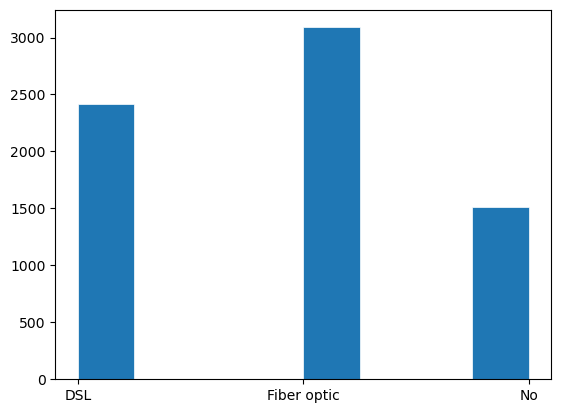

In [352]:
plt.hist(df['InternetService'], bins=8, linewidth=0.5, edgecolor="white")

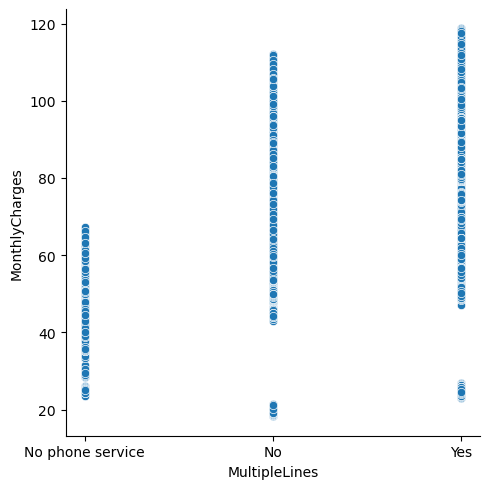

In [211]:
sns.relplot(data=df, x="MultipleLines", y="MonthlyCharges")

In [228]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [242]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

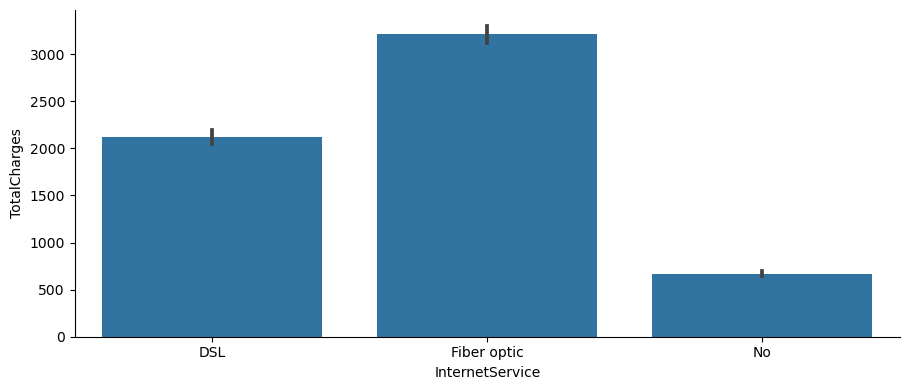

In [246]:
g = sns.FacetGrid(df, height=4, aspect=2.3)
g.map(sns.barplot, "InternetService", "TotalCharges", order=["DSL", "Fiber optic",'No'])

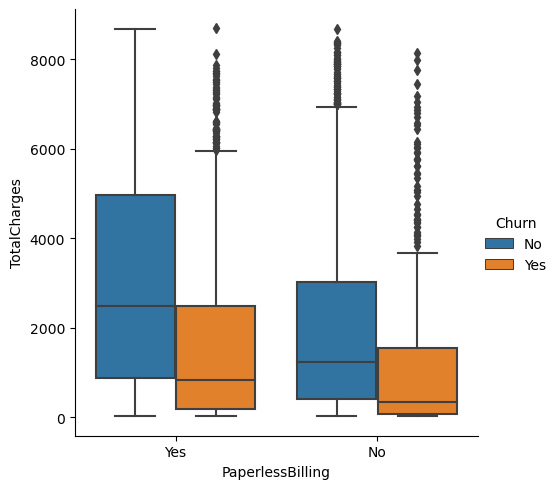

In [237]:
sns.catplot(data=df, x="PaperlessBilling", y="TotalCharges", hue="Churn", kind="box")

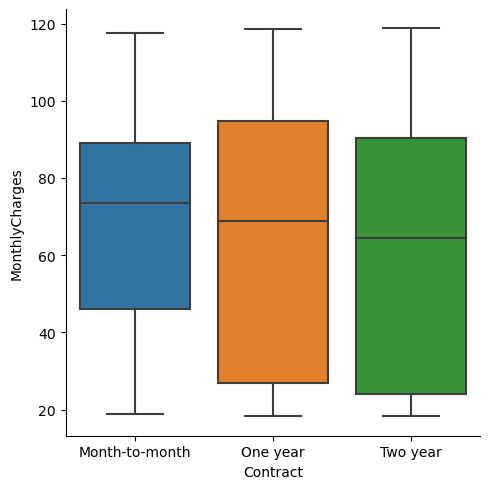

In [233]:
sns.catplot(data=df, x="Contract", y="MonthlyCharges", kind="box")

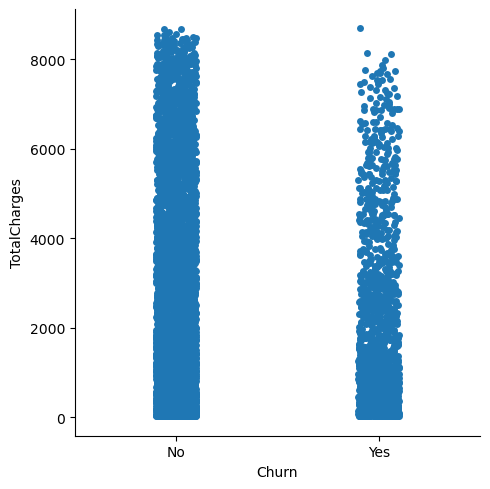

In [232]:
sns.catplot(data=df, x="Churn", y="TotalCharges")

In [251]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

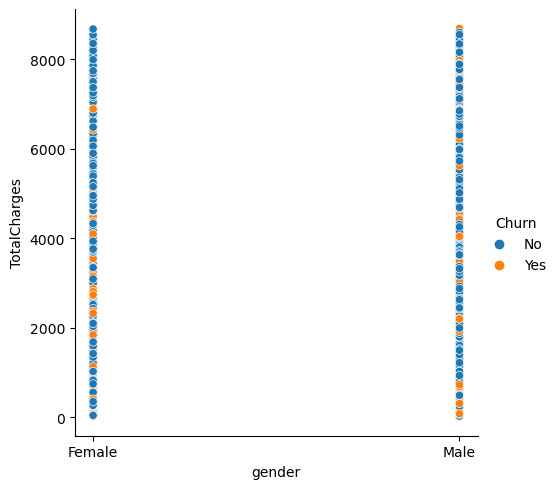

In [207]:
sns.relplot(
    data=df,
    x="gender", y="TotalCharges", 
    hue="Churn"
)

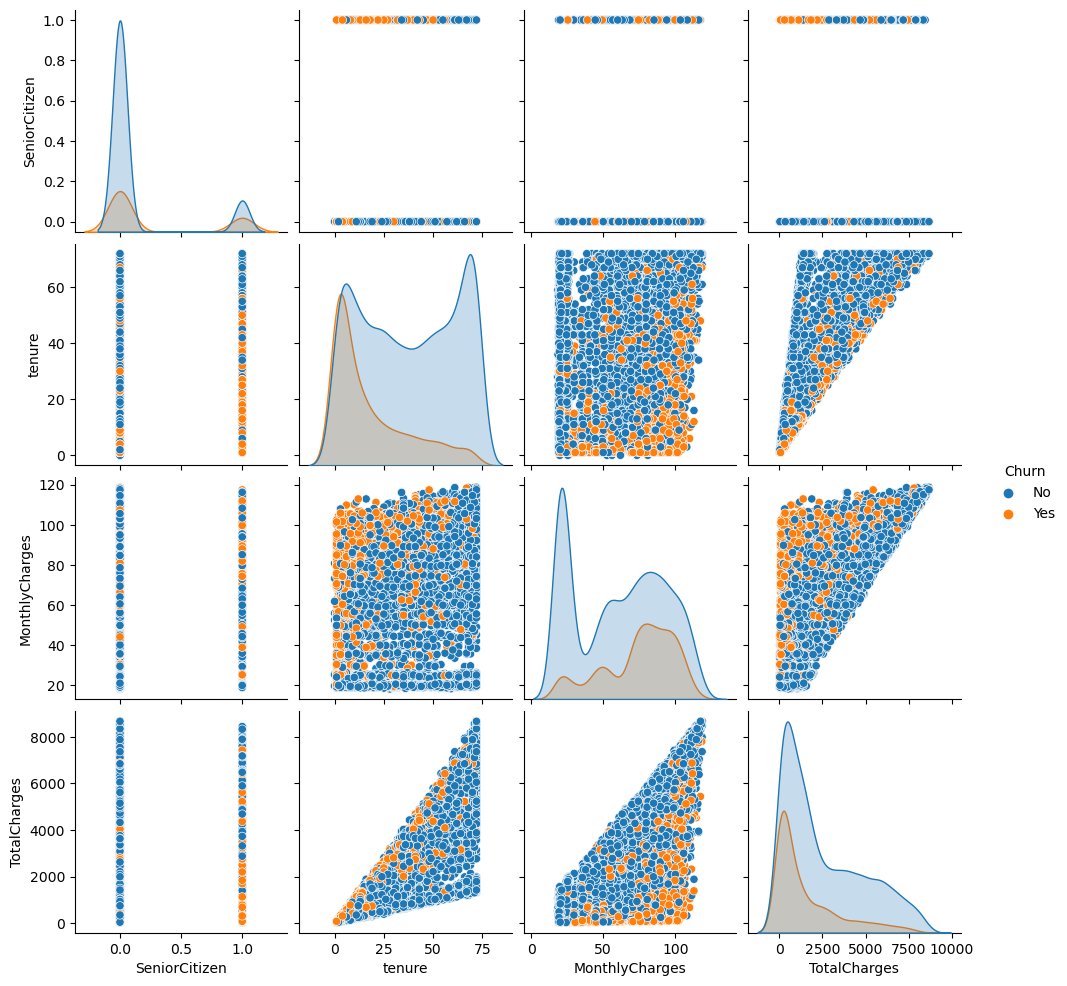

2024-04-01 20:25:08,697 - INFO     - Executing shutdown due to inactivity...
2024-04-01 20:25:12,872 - INFO     - Executing shutdown...
2024-04-01 20:25:12,889 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [250]:
sns.pairplot(df,hue='Churn')

<Axes: >

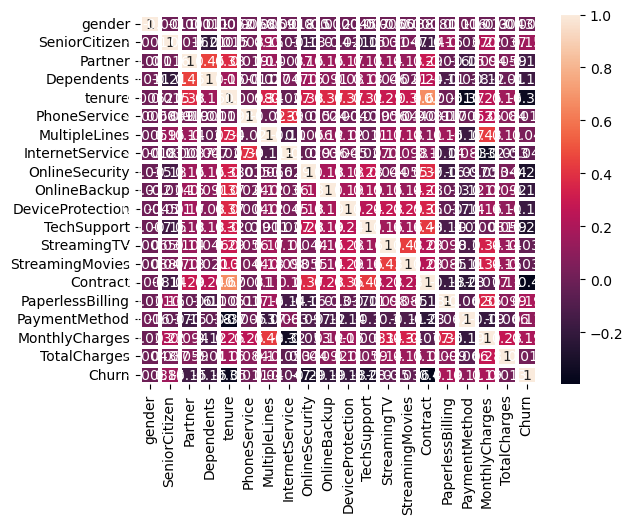

In [294]:
sns.heatmap(df.corr(),annot = True,linewidths=2.6)

### Error Identification

In [106]:
for i in df.columns:
    print(i , df[i].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.

### Split the data

In [274]:
X = df.drop('Churn',axis = 1)
y = df['Churn']

In [275]:
X.shape

(7021, 19)

In [276]:
y.shape

(7021,)

In [277]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 13)

### Data Preprocessing

In [278]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

### KNN

In [279]:
knn = KNeighborsClassifier(n_neighbors=5)

In [280]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [281]:
try:
    # Convert X_test to NumPy array
    X_test_np = np.array(X_test)
    y_pred = knn.predict(X_test_np)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
except Exception as e:
    print("An error occurred during prediction:", e)

Accuracy: 0.7451957295373666


In [282]:
#y_pred = knn.predict(X_test.values)

In [283]:
accuracy_score(y_test,y_pred)

0.7451957295373666

In [284]:
confusion_matrix(y_test,y_pred)

array([[902, 157],
       [201, 145]], dtype=int64)

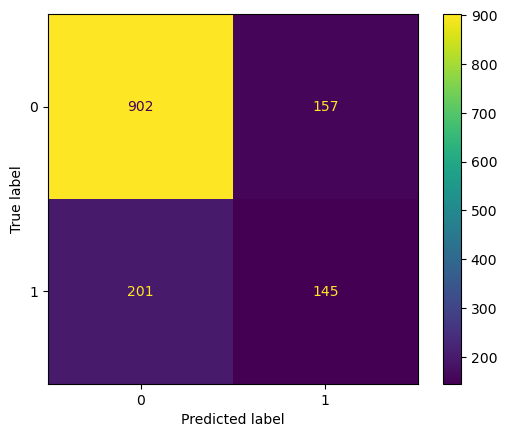

In [285]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

### DecisionTree

In [332]:
dt  = DecisionTreeClassifier()

In [333]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [334]:
y_pred = dt.predict(X_test)

In [335]:
y_pred


array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
#This is a method commonly available in machine learning libraries like scikit-learn in Python. 
#It's used to evaluate the performance of a model on a given dataset. Specifically, 
#for classification models like decision trees, the score() method typically calculates the accuracy of the model.

In [337]:
accuracy_dt = dt.score(X_test,y_test)

In [338]:
accuracy_dt

0.7181494661921708

In [340]:
confusion_matrix(y_test,y_pred)

array([[835, 224],
       [172, 174]], dtype=int64)

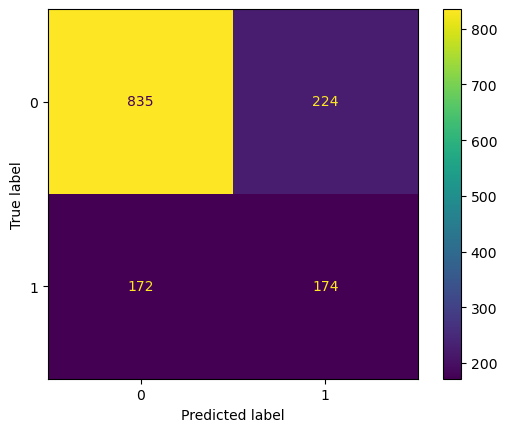

2024-04-01 22:20:13,990 - INFO     - Executing shutdown due to inactivity...
2024-04-01 22:20:18,195 - INFO     - Executing shutdown...
2024-04-01 22:20:18,211 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [341]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

## Naive Bayes

In [296]:
import scipy.stats as st

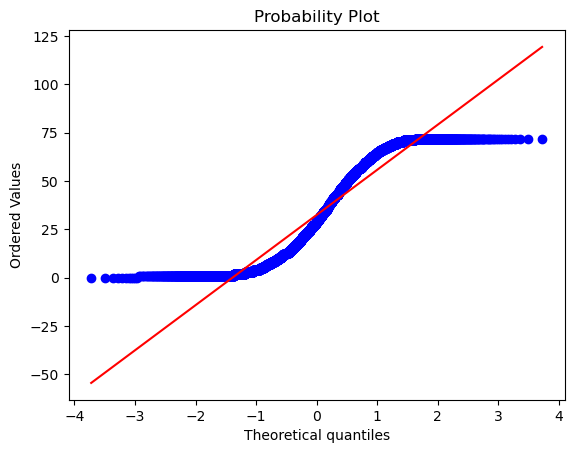

In [297]:
st.probplot(df['tenure'],plot = plt)
plt.show()

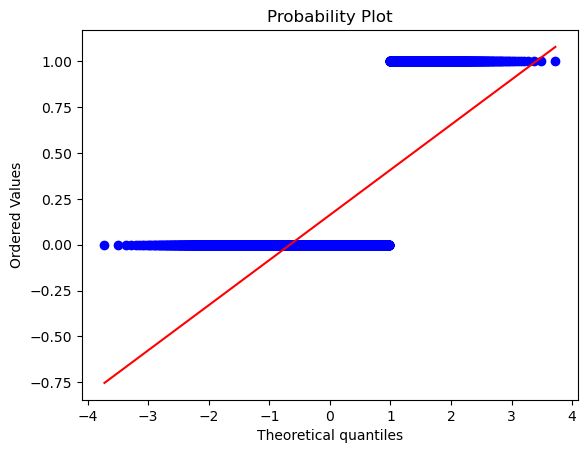

In [303]:

st.probplot(df['SeniorCitizen'],plot = plt)
plt.show()

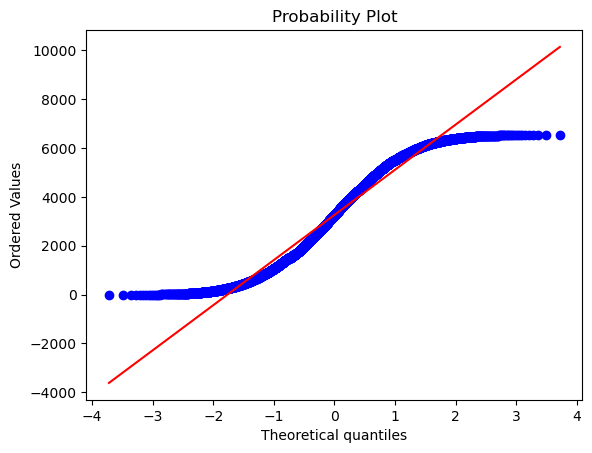

In [301]:
st.probplot(df['TotalCharges'],plot = plt)
plt.show()

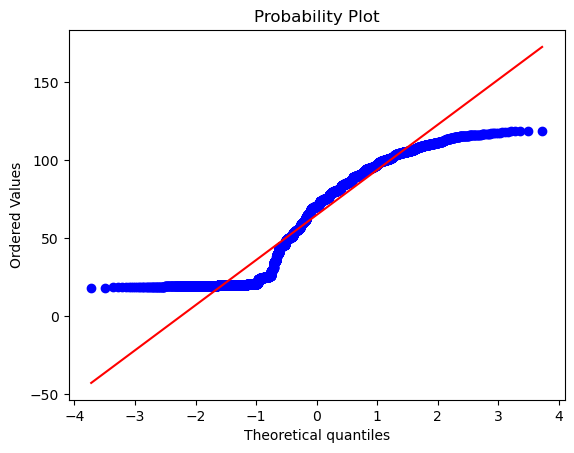

In [300]:
st.probplot(df['MonthlyCharges'],plot = plt)
plt.show()

In [305]:
X_train['tenure']=np.square(X_train['tenure'])
X_train['MonthlyCharges']=np.square(X_train['MonthlyCharges'])
X_test['tenure']=np.square(X_test['tenure'])
X_test['MonthlyCharges']=np.square(X_test['MonthlyCharges'])

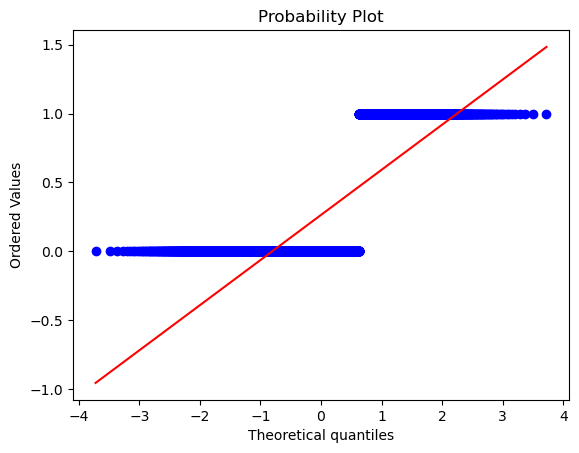

In [304]:
st.probplot(df['Churn'],plot = plt)
plt.show()

In [306]:
gnb =GaussianNB()

In [307]:
gnb.fit(X_train,y_train)

GaussianNB()

In [308]:
y_pred = gnb.predict(X_test)

In [309]:
accuracy_score(y_test,y_pred)

0.7416370106761566

In [310]:
confusion_matrix(y_test,y_pred)

array([[789, 270],
       [ 93, 253]], dtype=int64)

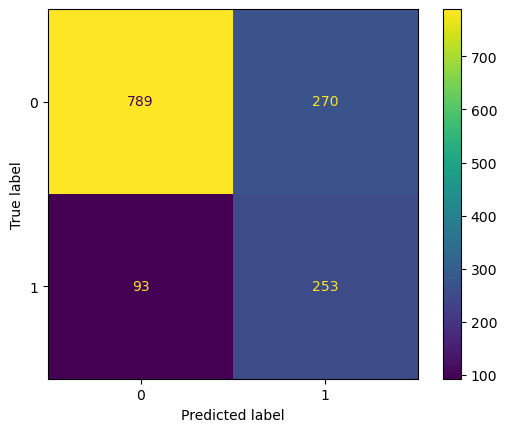

In [311]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

### Logistic Regression

In [325]:
lr = LogisticRegression()

In [326]:
lr.fit(X_train,y_train)

LogisticRegression()

In [327]:
accuracy = lr.score(X_test,y_test)

In [331]:
accuracy

0.804982206405694

In [328]:
y_pred= lr.predict(X_test)


In [329]:
report = classification_report(y_test,y_pred)

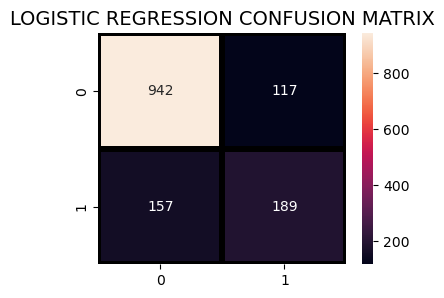

In [324]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()